<a href="https://colab.research.google.com/github/vjferro/data_-science/blob/main/An%C3%A1lise_explorat%C3%B3ria_de_dados_do_setor_imobili%C3%A1rio_Imers%C3%A3o_alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise exploratória de dados do setor imobiliário da cidade de São Paulo  - Imersão Dados 4 Alura**










---



Os trabalhos realizados nesse notebook são fruto do evento Imersão Dados 04 da empresa de educação em tecnologia Alura. Os dados fornecidos no evento são públicos e foram selecionadas pelos instrutores Thiago Gonçalves (Machine Learning Engineering Manager na Creditas e bacharel em Física pela Unesp)  e Vivian Yamassaki (Lead Data Scientist I na Creditas. É mestre em Ciências pelo Programa de Pós-graduação em Sistemas de Informação da Escola de Artes, Ciências e Humanidades (EACH)). O evento também contou com a participação de Paulo Silveira, Co-fundador e CEO da Alura. É bacharel em Ciência da Computação e Mestre pela USP em Geometria computacional. Nesse notebook iremos fazer uma análise exploratória dos dados bem como realizar os ajustes necessários para as primeira manipulações e análises de dados. 

**1 - Para iniciar os trabalhos vamos primeiramente importar algumas bibliotecas fundamentais para análise exploratoria de dados do Python.** 

In [58]:
import pandas as pd
import numpy as np
import plotly.express as px

**2- Lendo os dados no formato CSV e disponibilizados por meio de link da web**

In [59]:
df = pd.read_csv('https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv')

**3 - Analise exploratória dos dados com o pandas**

In [60]:
df

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000
...,...,...,...,...,...,...,...,...
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000
10006,"Rua Manuel Onha, , 514",Vila Oratório,São Paulo,185,3,2,2,R$ 2.200\n /Mês


In [61]:
df.sample(10) #mostra de maneira aleatória linhas do DataFrame

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
5438,"Rua Maestro Savino de Benedictis, 143",Rio Pequeno,São Paulo,100,2,1,2,R$ 398.000
5585,Rua Drava,Vila Moinho Velho,São Paulo,305,3,1,6,R$ 1.450.000
3444,Rua Doutor Veiga Filho,Santa Cecília,São Paulo,466,8,5,7,R$ 2.590.000
1373,Rua Oscar Caravelas,Sumarezinho,São Paulo,265,3,4,4,R$ 1.800.000
714,"Rua Umburanas, 417",Alto de Pinheiros,São Paulo,450,4,7,2,R$ 4.200.000
1281,Rua Martinho Vaz de Barros,Vila Pirajussara,São Paulo,240,3,3,4,R$ 890.000
1236,Rua Mário de Melo,Pacaembu,São Paulo,420,4,2,5,R$ 3.000.000
8841,NaN,Brooklin Paulista,São Paulo,485,5,8,6,R$ 2.900.000
9256,NaN,Morumbi,São Paulo,659,5,5,6,R$ 4.800.000
3823,NaN,Morumbi,São Paulo,450,4,5,4,R$ 2.300.000


In [62]:
df['Bairro'][9711] #slicing para imprimir um valor identificado por coluna e linha (index)

'Vila Gomes'

In [63]:
df['Bairro'] == "Vila Mariana" # localizar determinado conteúdo dentro de uma coluna 

0        False
1        False
2        False
3        False
4        False
         ...  
10003    False
10004    False
10005    False
10006    False
10007    False
Name: Bairro, Length: 10008, dtype: bool

In [64]:
(df['Bairro'] == "Vila Mariana")*1

0        0
1        0
2        0
3        0
4        0
        ..
10003    0
10004    0
10005    0
10006    0
10007    0
Name: Bairro, Length: 10008, dtype: int64

In [65]:
sum((df['Bairro'] == "Vila Mariana")) # Fazendo uma contagem com a função "Sum" passando como parametro coluna e valor desejado para contagem. 

184

In [66]:
tem_imoveis_vila = (df['Bairro'] == "Vila Mariana") #Salvando o recorte do DataFrame(boleno) em uma variável. 
tem_imoveis_vila #Visualizando o objeto. 

0        False
1        False
2        False
3        False
4        False
         ...  
10003    False
10004    False
10005    False
10006    False
10007    False
Name: Bairro, Length: 10008, dtype: bool

In [67]:
df[tem_imoveis_vila] # Visualizando o DataFrame salvo no objeto. 

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000
...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000


In [68]:
df[tem_imoveis_vila]['Metragem'].mean() # Calculando a média de metragem apenas dos imóveis da Vila Mariana. 

233.6195652173913

In [69]:
df['Bairro'].value_counts() # Contagem dos valores repetidos de uma conluna

Alto de Pinheiros     409
Jardim Guedala        403
Jardim Paulista       309
Brooklin Paulista     247
Jardim Europa         240
                     ... 
Jardim das Imbuias      1
Vila Represa            1
Vila Nancy              1
Sítio Represa           1
Vila Invernada          1
Name: Bairro, Length: 701, dtype: int64

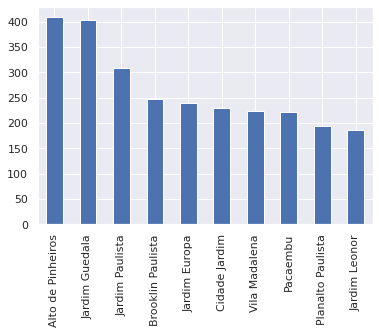

In [70]:
n_imovei_bairro = df['Bairro'].value_counts() # Colocando a média em uma variável 
n_imovei_bairro.head(10).plot.bar() # Plotando gráfico de barras do pandas dos dez bairros com mais imóveis 

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [72]:
df.loc[df['Vagas']>= 40] # Analisando imóveis que tenham 40 ou mais vagas. 

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
2513,NaN,Vila Tramontano,São Paulo,1650,6,16,42,R$ 100.000\n /Mês
3098,NaN,Pacaembu,São Paulo,1490,5,11,40,R$ 25.000\n /Mês
3385,NaN,Pacaembu,São Paulo,1495,5,11,40,R$ 25.000\n /Mês
4969,Rua Comendador Elias Zarzur,Santo Amaro,São Paulo,500,4,10,50,R$ 3.700.000
5450,Rua Comendador Elias Zarzur,Santo Amaro,São Paulo,505,4,10,50,R$ 3.700.000


## **Algumas Desafio propostos pelos instrutores para o conteúdo da Aula 01**

**1 - Realizar a média da metragem para cada um dos bairros. (Proposto pelo Paulo)**

In [73]:
media_metragem_bairro = df.groupby('Bairro').mean()
media_metragem_bairro = media_metragem_bairro[["Metragem"]]
display(media_metragem_bairro)

,Metragem
Bairro,
Aclimação,253.06
Alto da Boa Vista,418.88
Alto da Lapa,294.34
Alto da Mooca,270.05
Alto de Pinheiros,433.44
...,...
Vila Água Funda,152.20
Água Branca,191.00
Água Fria,165.42


**2 - Duas formas de selecionar os dados por bairro (consultar os métodos na documentação do Pandas). (Proposto pelo Thiago)**

In [74]:
df['Bairro']


0         Planalto Paulista
1        Jardim dos Estados
2           Jardim Reimberg
3            Jardim Morumbi
4                     Mooca
                ...        
10003            Vila Sofia
10004       Bosque da Saúde
10005         Vila da Saúde
10006         Vila Oratório
10007           Vila Alpina
Name: Bairro, Length: 10008, dtype: object

In [75]:
df.Bairro

0         Planalto Paulista
1        Jardim dos Estados
2           Jardim Reimberg
3            Jardim Morumbi
4                     Mooca
                ...        
10003            Vila Sofia
10004       Bosque da Saúde
10005         Vila da Saúde
10006         Vila Oratório
10007           Vila Alpina
Name: Bairro, Length: 10008, dtype: object

**3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, assim como tentar colocar alguma conclusão. (Proposto pelo Thiago)**

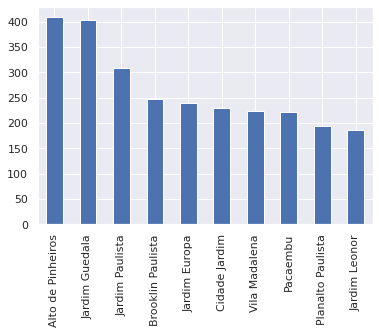

In [76]:
numero_de_bairros = df['Bairro'].value_counts()
numero_de_bairros.head(10).plot.bar()

**4 - Pegar outras estatísticas dos dados (como média, mediana, mim, max). (Proposto pela Vivian)**

In [77]:
df.describe()

,Metragem,Quartos,Banheiros,Vagas
count,10008.00,10008.00,10008.00,10008.00
mean,442.30,3.48,3.88,4.10
std,7515.38,1.06,1.99,2.82
min,10.00,1.00,1.00,1.00
25%,173.00,3.00,2.00,2.00
50%,290.00,3.00,4.00,4.00
75%,460.25,4.00,5.00,5.00
max,750000.00,16.00,40.00,50.00


**5 - Descobrir quais são os bairros que não tem nome de rua. (Proposto pela Vivian)**

In [78]:
df[df['Rua'].isnull()]['Bairro'].value_counts()

Jardim Guedala                      190
Alto de Pinheiros                   169
Jardim Paulista                     138
Jardim Europa                       128
Jardim Leonor                       118
                                   ... 
Jardim do Colégio (Zona Norte)        1
Alto da Boa Vista                     1
Jardim Aeroporto                      1
Conjunto Residencial Vista Verde      1
Jardim Santo Elias                    1
Name: Bairro, Length: 394, dtype: int64

## **Ajustes na colunar valor do DataFrame com o Pandas**




In [79]:
df['Valor'] = df['Valor'].str.replace('.','') # função para substituir os pontos por espaço vazio

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [80]:
df

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7000000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3700000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540000
...,...,...,...,...,...,...,...,...
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665000
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2300000
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1050000
10006,"Rua Manuel Onha, , 514",Vila Oratório,São Paulo,185,3,2,2,R$ 2200\n /Mês


# **Aula 02**

In [81]:
df['Valor'][0]

'R$ 7000000'

In [82]:
df['Valor'][0].split()


['R$', '7000000']

In [83]:
df['Valor'].str.split()

0           [R$, 7000000]
1           [R$, 3700000]
2            [R$, 380000]
3            [R$, 685000]
4            [R$, 540000]
               ...       
10003        [R$, 665000]
10004       [R$, 2300000]
10005       [R$, 1050000]
10006    [R$, 2200, /Mês]
10007        [R$, 270000]
Name: Valor, Length: 10008, dtype: object

In [84]:
df['Valor'].str.split(expand=True)

,0,1,2
0,R$,7000000,None
1,R$,3700000,None
2,R$,380000,None
3,R$,685000,None
4,R$,540000,None
...,...,...,...
10003,R$,665000,None
10004,R$,2300000,None
10005,R$,1050000,None
10006,R$,2200,/Mês


In [85]:
df['Valor'].str.split(expand=True)[0].unique()

array(['R$'], dtype=object)

In [86]:
df['Valor'].str.split(expand=True)[2].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

In [87]:
df[['Moeda','Valor_anuncio','tipo_anuncio']] = df['Valor'].str.split(expand=True)
df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7000000,R$,7000000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3700000,R$,3700000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380000,R$,380000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685000,R$,685000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540000,R$,540000,None


In [88]:
df['tipo_anuncio'].isnull

<bound method Series.isnull of 0        None
1        None
2        None
3        None
4        None
         ... 
10003    None
10004    None
10005    None
10006    /Mês
10007    None
Name: tipo_anuncio, Length: 10008, dtype: object>

In [89]:
df[df['tipo_anuncio'].isnull()]['tipo_anuncio'].unique()

array([None], dtype=object)

In [90]:
df_vendas = df[df['tipo_anuncio'].isnull()]
df_vendas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7000000,R$,7000000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3700000,R$,3700000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380000,R$,380000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685000,R$,685000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540000,R$,540000,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1500000,R$,1500000,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665000,R$,665000,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2300000,R$,2300000,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1050000,R$,1050000,None


In [91]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rua            6107 non-null   object
 1   Bairro         9146 non-null   object
 2   Cidade         9156 non-null   object
 3   Metragem       9156 non-null   int64 
 4   Quartos        9156 non-null   int64 
 5   Banheiros      9156 non-null   int64 
 6   Vagas          9156 non-null   int64 
 7   Valor          9156 non-null   object
 8   Moeda          9156 non-null   object
 9   Valor_anuncio  9156 non-null   object
 10  tipo_anuncio   0 non-null      object
dtypes: int64(4), object(7)
memory usage: 858.4+ KB


In [92]:
df_vendas['Valor_anuncio'].str.replace('.',"")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


0        7000000
1        3700000
2         380000
3         685000
4         540000
          ...   
10002    1500000
10003     665000
10004    2300000
10005    1050000
10007     270000
Name: Valor_anuncio, Length: 9156, dtype: object

In [93]:
df_vendas['Valor_anuncio_float'] = df_vendas['Valor_anuncio'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [94]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rua                  6107 non-null   object 
 1   Bairro               9146 non-null   object 
 2   Cidade               9156 non-null   object 
 3   Metragem             9156 non-null   int64  
 4   Quartos              9156 non-null   int64  
 5   Banheiros            9156 non-null   int64  
 6   Vagas                9156 non-null   int64  
 7   Valor                9156 non-null   object 
 8   Moeda                9156 non-null   object 
 9   Valor_anuncio        9156 non-null   object 
 10  tipo_anuncio         0 non-null      object 
 11  Valor_anuncio_float  9156 non-null   float64
dtypes: float64(1), int64(4), object(7)
memory usage: 929.9+ KB


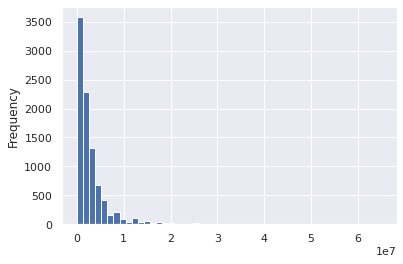

In [95]:
df_vendas['Valor_anuncio_float'].plot.hist(bins=50)

In [96]:
pd.set_option("display.precision",2) # Ajusta o dataframe para duas casas decimais
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Retira a dotação científica do dataframe 
df_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


In [97]:
df_vendas.describe(include='all')

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,tipo_anuncio,Valor_anuncio_float
count,6107,9146,9156,9156.00,9156.00,9156.00,9156.00,9156,9156,9156,0,9156.00
unique,3006,697,1,NaN,NaN,NaN,NaN,939,1,939,0,NaN
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo,NaN,NaN,NaN,NaN,R$ 2500000,R$,2500000,NaN,NaN
freq,24,369,9156,NaN,NaN,NaN,NaN,182,9156,182,NaN,NaN
mean,NaN,NaN,NaN,434.42,3.45,3.80,3.96,NaN,NaN,NaN,NaN,3052202.96
std,NaN,NaN,NaN,7856.42,1.05,1.97,2.60,NaN,NaN,NaN,NaN,3944208.19
min,NaN,NaN,NaN,10.00,1.00,1.00,1.00,NaN,NaN,NaN,NaN,13000.00
25%,NaN,NaN,NaN,168.00,3.00,2.00,2.00,NaN,NaN,NaN,NaN,890000.00
50%,NaN,NaN,NaN,276.00,3.00,4.00,4.00,NaN,NaN,NaN,NaN,1800000.00
75%,NaN,NaN,NaN,450.00,4.00,5.00,5.00,NaN,NaN,NaN,NaN,3500000.00


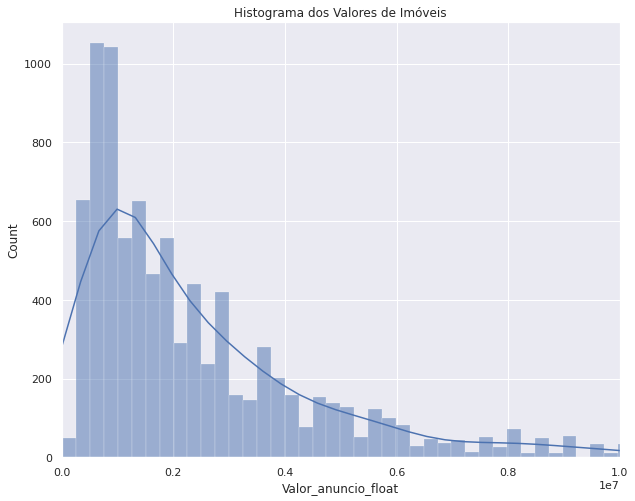

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize= (10,8))
ax = sns.histplot(data=df_vendas, x= 'Valor_anuncio_float', kde=True)
ax.set_title('Histograma dos Valores de Imóveis')
plt.xlim((-50, 10000000)) # Ajustando os limites do Histograma 
plt.show()

In [99]:
# Preço do metro quadrado por bairro e plotar em um gráfico ideal.

df_vendas['Valor_Metragem'] = df_vendas['Valor_anuncio_float'] / df_vendas['Metragem']
df_vendas.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,tipo_anuncio,Valor_anuncio_float,Valor_Metragem
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7000000,R$,7000000,None,7000000.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3700000,R$,3700000,None,3700000.00,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380000,R$,380000,None,380000.00,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685000,R$,685000,None,685000.00,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540000,R$,540000,None,540000.00,5400.00


In [100]:
df_vendas.groupby('Bairro').mean()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_Metragem
Bairro,,,,,,
Aclimação,246.16,3.27,3.04,2.91,1763200.01,7656.17
Alto da Boa Vista,418.88,4.12,5.12,4.62,2391250.00,5849.57
Alto da Lapa,299.25,3.15,3.85,4.00,2083168.75,7606.73
Alto da Mooca,270.05,3.30,2.60,3.65,1184170.00,5691.74
Alto de Pinheiros,429.85,3.94,4.83,4.95,4782698.96,11269.98
...,...,...,...,...,...,...
Vila Água Funda,152.20,2.60,2.20,2.60,652000.00,4467.13
Água Branca,173.58,3.08,3.25,2.25,1226500.00,7269.11
Água Fria,165.42,2.83,3.42,2.50,927083.33,5841.10


In [101]:
df_bairro = df_vendas.groupby('Bairro').sum()
df_bairro

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_Metragem
Bairro,,,,,,
Aclimação,19447,258,240,230,139292801.00,604837.39
Alto da Boa Vista,3351,33,41,37,19130000.00,46796.55
Alto da Lapa,23940,252,308,320,166653500.00,608538.25
Alto da Mooca,5401,66,52,73,23683400.00,113834.80
Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61
...,...,...,...,...,...,...
Vila Água Funda,761,13,11,13,3260000.00,22335.64
Água Branca,2083,37,39,27,14718000.00,87229.37
Água Fria,1985,34,41,30,11125000.00,70093.25


In [102]:
df_bairro['Valor_m2_bairro']= df_bairro['Valor_anuncio_float']/df_bairro['Metragem']
df_bairro

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_Metragem,Valor_m2_bairro
Bairro,,,,,,,
Aclimação,19447,258,240,230,139292801.00,604837.39,7162.69
Alto da Boa Vista,3351,33,41,37,19130000.00,46796.55,5708.74
Alto da Lapa,23940,252,308,320,166653500.00,608538.25,6961.30
Alto da Mooca,5401,66,52,73,23683400.00,113834.80,4385.00
Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61,11126.34
...,...,...,...,...,...,...,...
Vila Água Funda,761,13,11,13,3260000.00,22335.64,4283.84
Água Branca,2083,37,39,27,14718000.00,87229.37,7065.77
Água Fria,1985,34,41,30,11125000.00,70093.25,5604.53


In [103]:
# Top 10 Bairros em vendas de imóveis 
df_vendas['Bairro'].value_counts()[:10].index

Index(['Alto de Pinheiros', 'Jardim Guedala', 'Jardim Paulista',
       'Brooklin Paulista', 'Jardim Europa', 'Pacaembu', 'Vila Madalena',
       'Cidade Jardim', 'Planalto Paulista', 'Jardim Leonor'],
      dtype='object')

In [104]:
df_bairro.rename(columns={'Valor_Metragem': 'Valor_m2'}, inplace=True) # Renomear nome da coluna

In [105]:
df_bairro

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2,Valor_m2_bairro
Bairro,,,,,,,
Aclimação,19447,258,240,230,139292801.00,604837.39,7162.69
Alto da Boa Vista,3351,33,41,37,19130000.00,46796.55,5708.74
Alto da Lapa,23940,252,308,320,166653500.00,608538.25,6961.30
Alto da Mooca,5401,66,52,73,23683400.00,113834.80,4385.00
Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61,11126.34
...,...,...,...,...,...,...,...
Vila Água Funda,761,13,11,13,3260000.00,22335.64,4283.84
Água Branca,2083,37,39,27,14718000.00,87229.37,7065.77
Água Fria,1985,34,41,30,11125000.00,70093.25,5604.53


In [106]:
df_bairro.reset_index(inplace=True)
df_bairro

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2,Valor_m2_bairro
0,Aclimação,19447,258,240,230,139292801.00,604837.39,7162.69
1,Alto da Boa Vista,3351,33,41,37,19130000.00,46796.55,5708.74
2,Alto da Lapa,23940,252,308,320,166653500.00,608538.25,6961.30
3,Alto da Mooca,5401,66,52,73,23683400.00,113834.80,4385.00
4,Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61,11126.34
...,...,...,...,...,...,...,...,...
692,Vila Água Funda,761,13,11,13,3260000.00,22335.64,4283.84
693,Água Branca,2083,37,39,27,14718000.00,87229.37,7065.77
694,Água Fria,1985,34,41,30,11125000.00,70093.25,5604.53
695,Água Funda,278,6,5,4,1090000.00,7753.73,3920.86


In [107]:
top_bairro = df_vendas['Bairro'].value_counts()[:10].index  # Filtrando os top 10 

In [108]:
df_bairro.query('Bairro in @top_bairro') # Separando os top 10 

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2,Valor_m2_bairro
4,Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61,11126.34
19,Brooklin Paulista,70002,778,862,832,475796789.00,1627341.87,6796.90
57,Cidade Jardim,132220,789,1008,1172,1164210900.00,1635692.98,8805.10
155,Jardim Europa,118898,795,993,1056,2414172900.00,4192164.45,20304.57
168,Jardim Guedala,972212,1443,2027,2161,1801165587.00,2833882.79,1852.65
187,Jardim Leonor,97141,697,941,902,646326369.00,1115858.80,6653.49
227,Jardim Paulista,130283,1028,1231,1171,2136081000.00,4279262.19,16395.70
338,Pacaembu,100285,774,889,1028,867956500.00,1753672.28,8654.90
396,Planalto Paulista,59250,636,768,713,374907000.00,1186380.95,6327.54
564,Vila Madalena,66250,739,786,712,583253030.00,1792770.40,8803.82


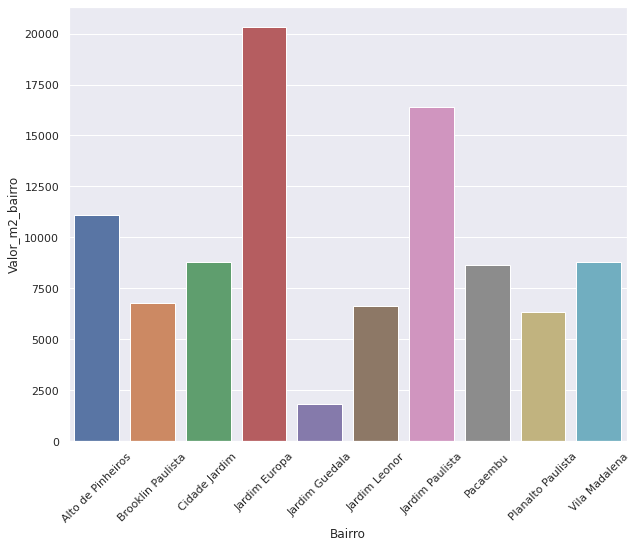

In [109]:
plt.figure(figsize= (10,8))
ax = sns.barplot(x='Bairro', y='Valor_m2_bairro', data=df_bairro.query('Bairro in @top_bairro')) 
ax.tick_params(axis='x', rotation=45)


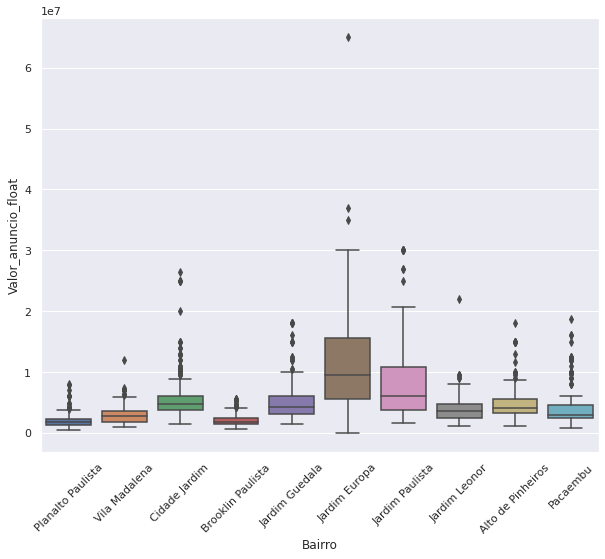

In [110]:
plt.figure(figsize= (10,8))
ax = sns.boxplot(data=df_vendas.query('Bairro in @top_bairro'), x='Bairro', y='Valor_anuncio_float')
ax.tick_params(axis='x', rotation=45)


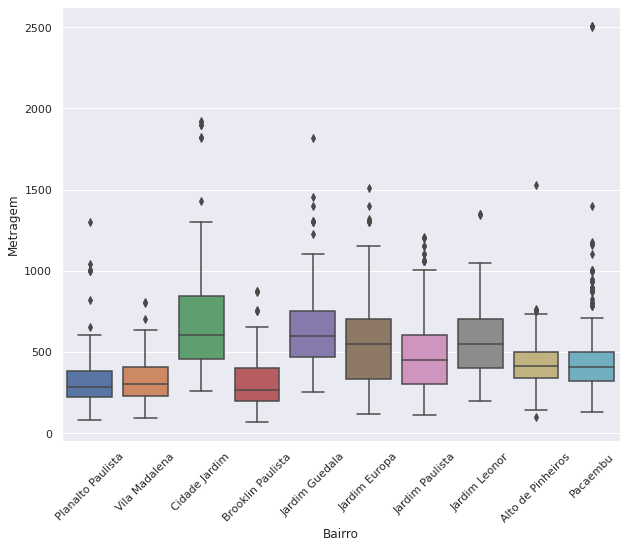

In [111]:
plt.figure(figsize= (10,8))
ax = sns.boxplot(data=df_vendas.query('Bairro in @top_bairro & Metragem < 30000'), x='Bairro', y='Metragem') #Filtrando os top 10 bairro com a metragem < 30000 metros quadrados.
ax.tick_params(axis='x', rotation=45)
